# Homework #4

How to do it? Uploading your .ipynb file into the corresponding homework in the LMS system. Any delay will not be accepted. 

###  Question 1: (5 points)

#### Let a user issue query terms (e.g. 肺炎 coronavirus) into the Google search engine (https://www.google.com.tw/) and then visit the first three SERPs to store as individual pages (e.g. page1.html, page1.html and page3.html)

Notes: Search Engine Results Pages (SERPs) are the pages that Google and other search engines show in response to a user’s search query.

In [1]:
import requests
query_string = input("輸入搜尋文字: ")
for i in range(0, 3):
    with open(f"page{i+1}.html", "w", encoding="utf-8") as file:
        response = requests.get(f'https://www.google.com.tw/search?q={query_string}&start={i*10}')
        file.write(response.text)

輸入搜尋文字: 肺炎 coronavirus


###  Question 2: (5 points)

#### Parsing your stored SERPs to obtain all links of anchor texts in the search results. 

Notes: Anchor text refers to the clickable words used to link one web page to another.

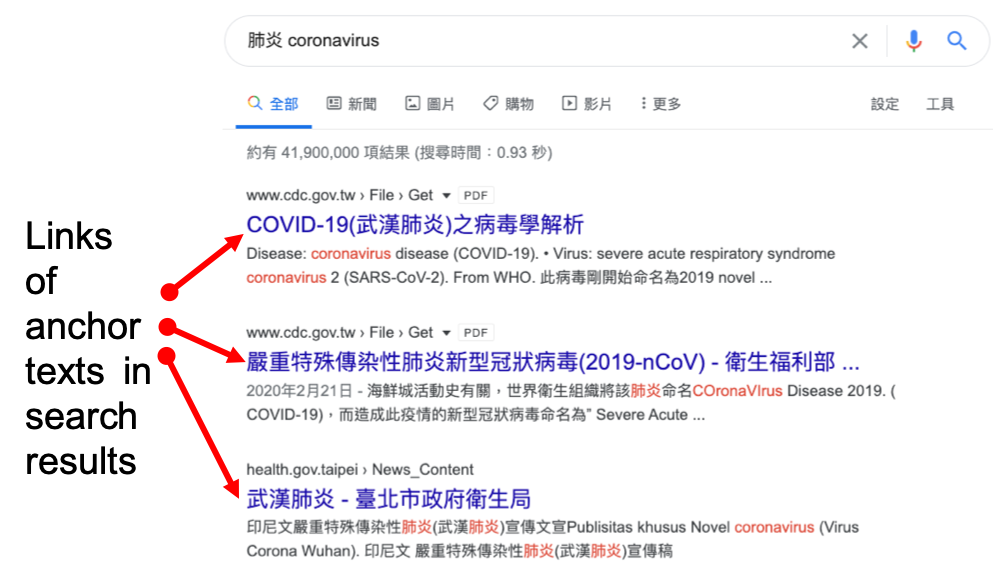

In [2]:
from bs4 import BeautifulSoup

links = []
for i in range(0, 3):
    with open(f"page{i+1}.html", "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file, 'html.parser')
        soup = soup.find(id='main').find_all("div", recursive=False)
        links += [i.a['href'] for i in soup[2:]]

In [3]:
print(len(links))
print(links)

30
['/url?q=https://www.cdc.gov.tw/File/Get/4mH7vraPA1vEAqaClfQsPw&sa=U&ved=2ahUKEwifw4GLsujoAhVwx4sBHYq0CcoQFjAAegQICBAB&usg=AOvVaw2qsH11MZpMLBNuLuijx5xx', '/url?q=https://d007.wzu.edu.tw/category/150004&sa=U&ved=2ahUKEwifw4GLsujoAhVwx4sBHYq0CcoQFjABegQIBhAB&usg=AOvVaw2hyWSKQMAnEy-DoPVHiHwe', '/url?q=https://campaign.commonhealth.com.tw/main/china-disease-347&sa=U&ved=2ahUKEwifw4GLsujoAhVwx4sBHYq0CcoQFjACegQICRAB&usg=AOvVaw1DqjBz54zvHWO4Cp1WvCzN', '/url?q=https://www.youtube.com/watch%3Fv%3DrFfmpTarZ0c&sa=U&ved=2ahUKEwifw4GLsujoAhVwx4sBHYq0CcoQFjADegQIBxAB&usg=AOvVaw3OTWJdWURyuNVDagjB4Jfh', '/url?q=http://www.unitedbiopharma.com/COVID-19/&sa=U&ved=2ahUKEwifw4GLsujoAhVwx4sBHYq0CcoQFjAEegQIBBAB&usg=AOvVaw0gqUlhJJXABpUXwsk_LLZz', '/url?q=http://www.rfi.fr/tw/%25E4%25B8%25AD%25E5%259C%258B/20200229-%25E4%25B8%25AD%25E5%259C%258B-%25E6%25AD%25A6%25E6%25BC%25A2-%25E6%2596%25B0%25E5%259E%258B%25E5%2586%25A0%25E7%258B%2580%25E7%2597%2585%25E6%25AF%2592-%25E8%2582%25BA%25E7%2582%258E-coronavir